# 🛒 Superstore Sales Analysis

This project analyzes the Superstore dataset to identify key sales trends, top-performing categories, customer segments, and delivery patterns.  
The goal is to generate insights that help improve sales strategy and business decision-making.


In [1]:
import pandas as pd

# point to data/superstore.csv
df = pd.read_csv("data/superstore.csv")
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.shape

(9800, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.describe() 

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
df.isnull().sum() 

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [13]:
df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


## 🔧 Data Cleaning
- Checked for missing values
- Converted `Order Date` and `Ship Date` to datetime
- Created new columns for `Order Year` and `Delivery Days`


In [14]:
# Create new features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days


In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

,Row ID,Order Date,Ship Date,Postal Code,Sales,Order Year,Order Month,Delivery Days
count,9800.000000,9800,9800,9789.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059,2016.724184,7.818469,3.961122
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,2015.000000,1.000000,0.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000,2016.000000,5.000000,3.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000,2017.000000,9.000000,4.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000,2018.000000,11.000000,5.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,2018.000000,12.000000,7.000000
std,2829.160653,NaN,NaN,32041.223413,626.651875,1.123984,3.281905,1.749614


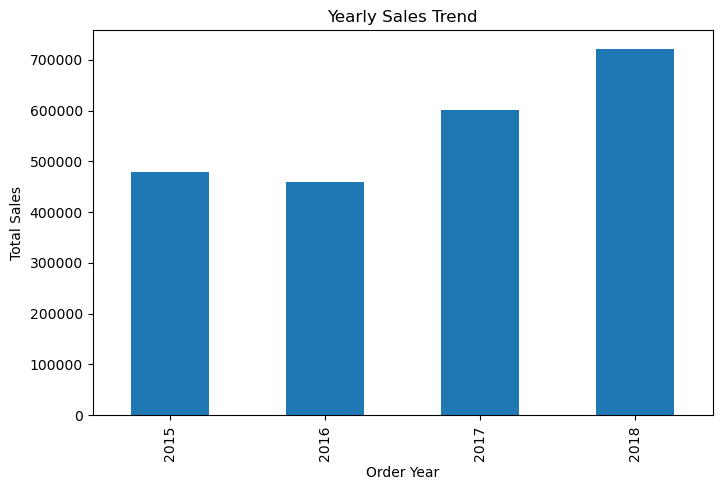

In [28]:
# ---- Yearly Sales Trend ----
from matplotlib import pyplot as plt

yearly_sales = df.groupby('Order Year')['Sales'].sum()
yearly_sales.plot(kind='bar', figsize=(8,5))

plt.title("Yearly Sales Trend")
plt.ylabel("Total Sales")


plt.savefig("yearly_sales_trend.png", dpi=300, bbox_inches='tight')


plt.show()


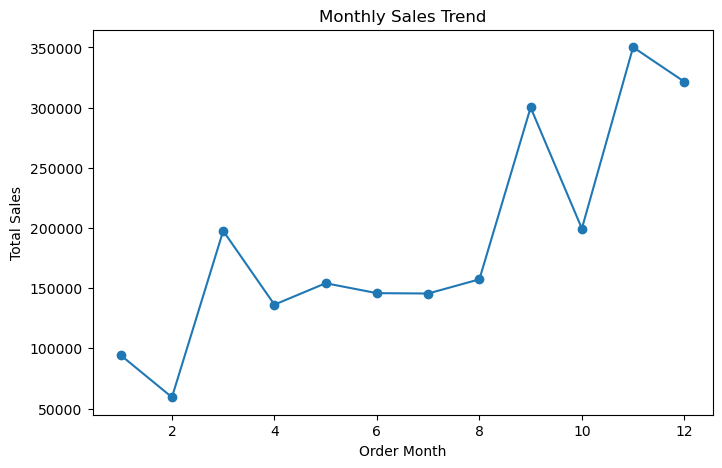

In [29]:
# ---- Monthly Sales Trend ----
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(8,5))

plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")

plt.savefig("monthly_sales_trend.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


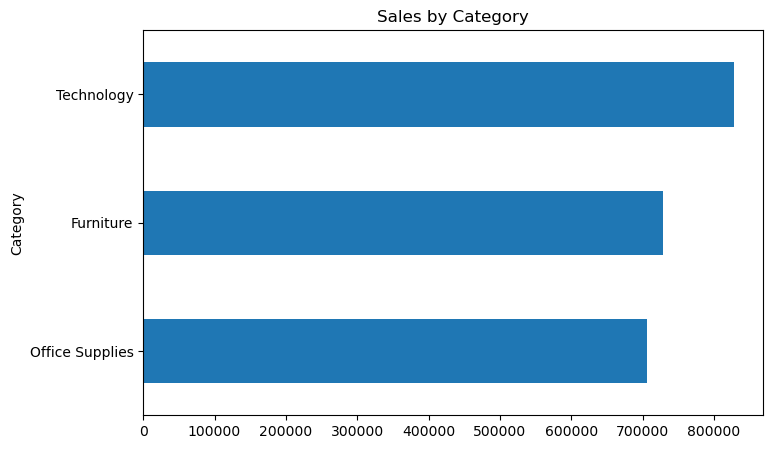

In [30]:
# ---- Sales by Category ----
category_sales = df.groupby('Category')['Sales'].sum().sort_values()
category_sales.plot(kind='barh', figsize=(8,5))

plt.title("Sales by Category")


plt.savefig("sales_by_category.png", dpi=300, bbox_inches='tight')

plt.show()


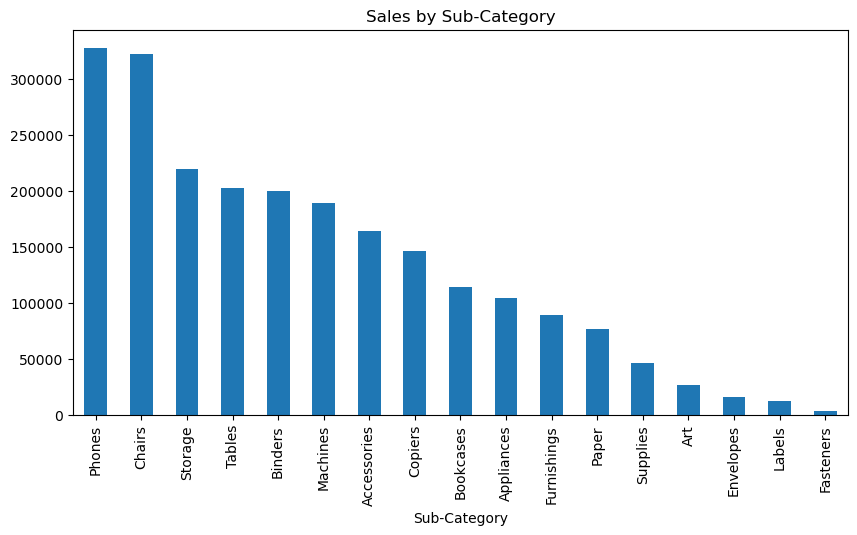

In [31]:
# ---- Sales by Sub-Category ----
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcat_sales.plot(kind='bar', figsize=(10,5))

plt.title("Sales by Sub-Category")


plt.savefig("sales_by_subcategory.png", dpi=300, bbox_inches='tight')

plt.show()


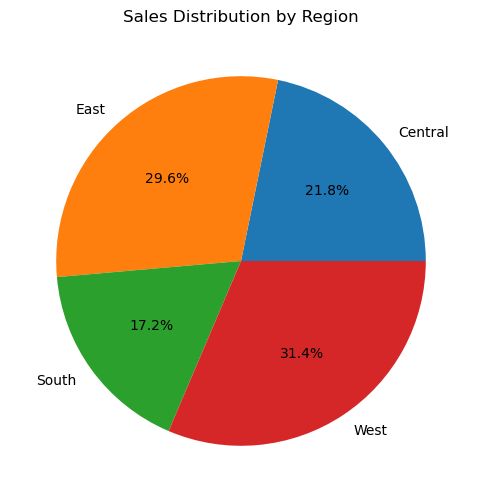

In [32]:
# ---- Sales by Region ----
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

plt.title("Sales Distribution by Region")
plt.ylabel("")


plt.savefig("sales_by_region.png", dpi=300, bbox_inches='tight')

plt.show()


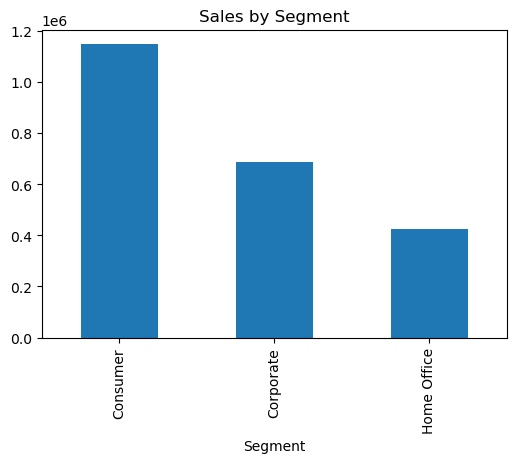

In [33]:
# ---- Sales by Segment ----
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_sales.plot(kind='bar', figsize=(6,4))

plt.title("Sales by Segment")


plt.savefig("sales_by_segment.png", dpi=300, bbox_inches='tight')

plt.show()


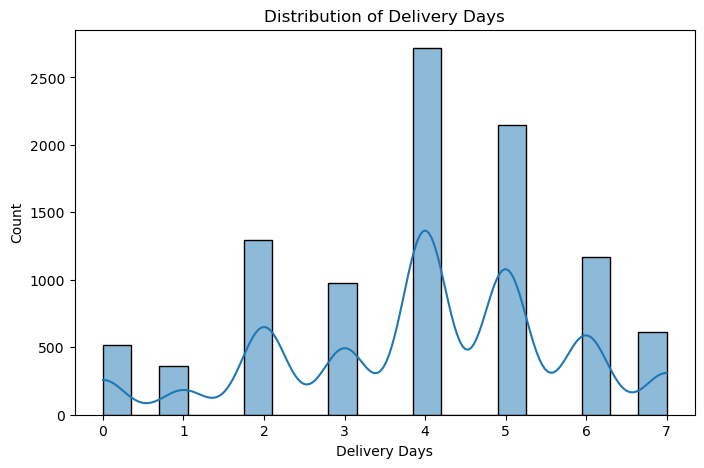

In [34]:
# ---- Delivery Analysis ----
import seaborn as sns
plt.figure(figsize=(8,5))   # optional for better size

sns.histplot(df['Delivery Days'], bins=20, kde=True)
plt.title("Distribution of Delivery Days")


plt.savefig("delivery_days_distribution.png", dpi=300, bbox_inches='tight')

plt.show()


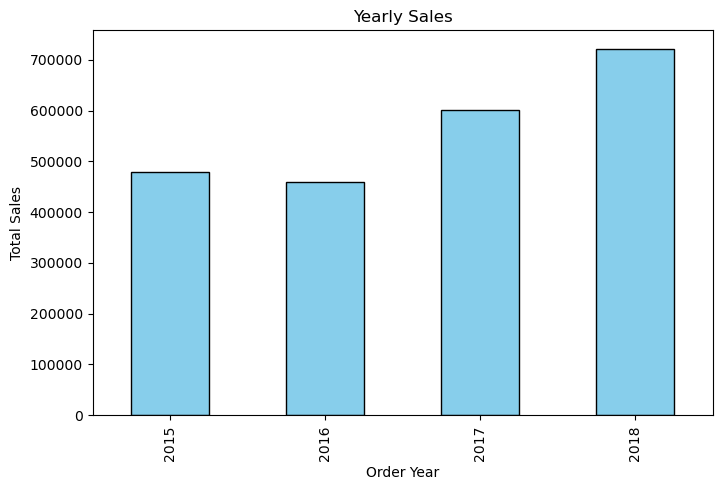

In [35]:
# 1. Highest Sales Year
# ==============
df['Order Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Yearly Sales")
plt.ylabel("Total Sales")


plt.savefig("yearly_sales.png", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_28752\2405286223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")


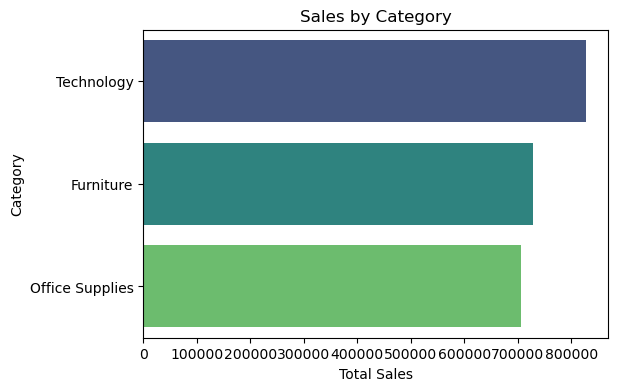

In [36]:
# 2. Best Performing Category
# ==============
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Sales by Category")
plt.xlabel("Total Sales")


plt.savefig("category_sales.png", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_28752\3930635360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="mako")


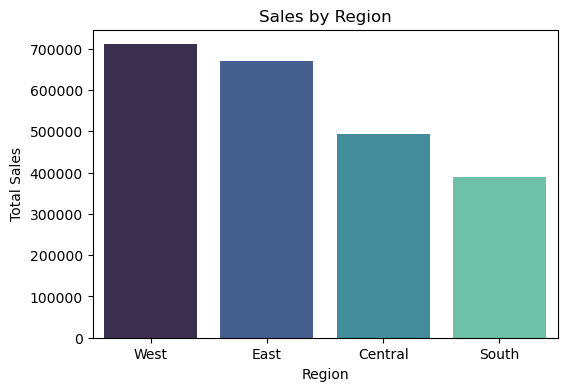

In [25]:
# 3. Region with Max Contribution
# ==============
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="mako")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()

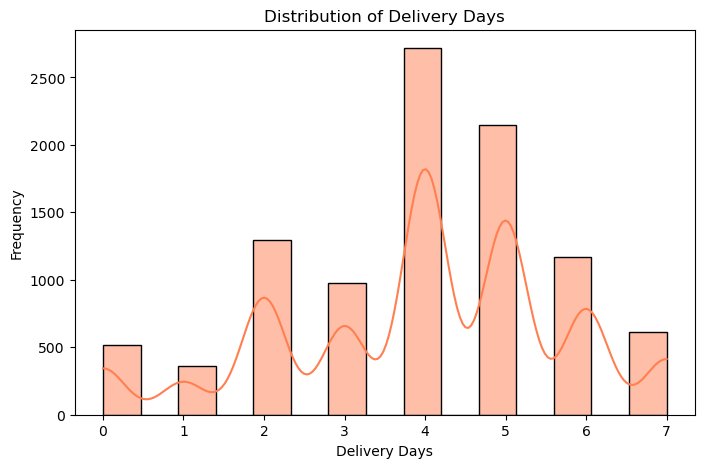

Average Delivery Days: 3.96
Fastest Delivery: 0 days
Slowest Delivery: 7 days


In [37]:
# ==============
# 4. Delivery Days Distribution
# ==============
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8,5))
sns.histplot(df['Delivery Days'], bins=15, kde=True, color="coral")
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")


plt.savefig("delivery_days_distribution.png", dpi=300, bbox_inches='tight')

plt.show()

# ✅ Summary stats
avg_days = df['Delivery Days'].mean()
min_days = df['Delivery Days'].min()
max_days = df['Delivery Days'].max()

print(f"Average Delivery Days: {avg_days:.2f}")
print(f"Fastest Delivery: {min_days} days")
print(f"Slowest Delivery: {max_days} days")


## 📊 Insights

- **Yearly Trend**: Sales peaked in 2017 with consistent growth.  
- **Category Performance**: Technology leads, followed by Furniture and Office Supplies.  
- **Regional Contribution**: The West region contributes the highest sales, while the South lags.  
- **Customer Segment**: Consumers are the largest contributors.  
- **Shipping**: Most orders are delivered in 3–4 days, but Standard Class sometimes causes delays.


## 💡 Recommendations

- Focus marketing on **Technology** (especially Phones).  
- Improve **South region sales** through promotions.  
- Optimize **Furniture category** with discounts.  
- Enhance **Standard Class shipping** efficiency.  
- Develop loyalty programs for **Corporate** and **Home Office** segments.
